a.) How does the Metropolis algorithm work in Monte Carlo simulations of the Ising model?
b.) Can you walk me through your Python code for simulating the 2D Ising model using Monte Carlo methods?
c.) How do you choose the initial spin configuration in your simulation?
d) How do you calculate the system's thermodynamic properties (such as magnetization and energy) from the simulated data?
e) Can you explain the role of the critical temperature in the behavior of the Ising model, and how do you estimate it in your simulation?
f) How do you ensure that your simulation results are statistically significant and not affected by finite-size effects?
g) Can you discuss possible extensions or modifications to your simulation code, including external magnetic fields or simulating higher-dimensional Ising models?
h) How do you visualize your simulation results, and what insights can you gain from the visualizations?
i) How do you compare your simulation results with analytical predictions or
experimental data for the Ising model?

Kindly open the script on Jupyter Notebooks.  
The Metropolis algorithm works as follows:


For various values of Beta (Represents temprature inverse) we run the simulation & compare the results.
Refrences used from https://sites.physics.wustl.edu/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import random

PART C)

Start with an initial configuration of spins in the lattice.  

The function make_lattice allows us to do so in a randomised manner, we choose either 1 or -1 with equal probability for each position in the lattice. 

In [2]:
def make_lattice():                           # return 25x25 grid of 1/-1
    x = random.choice([1,-1], size=(ns, ns))
    return x

PART F)


The bc function is used to implement periodic boundary conditions, meaning that the lattice is considered to 
wrap around at the edges. This ensures our calculations are statistically correct & are not limited because of the finite size of the grid. 

In [3]:
def bc(i):          # boundary condition for indexes 
    if i > ns-1:
        return 0
    if i < 0:
        return ns-1
    else:
        return i

PART D)

The energy(N, M) function calculates the energy of a single spin in a lattice with index N,M. It takes the indices of a site on the lattice, (N, M), and returns the energy of that site. The energy is calculated using the Ising model, where each site on the lattice can have a spin of +1 or -1. The energy of a site is given by the product of the spin at that site and the sum of the spins of its neighboring sites, where neighboring sites are those directly above, below, to the left, and to the right of the current site. 


The en() function calculates the total energy of the lattice by summing the energy of each site on the lattice. It does this by iterating over all the sites on the lattice using nested for loops and calling the energy(N, M) function for each site. The total energy is returned at the end.


The mag() function calculates the average magnetization per site of an Ising model lattice by summing up the spin values of all the sites and dividing by the total number of sites. It returns the magnetization value.

In [4]:
def mag():       # find (total(1) - total(-1)) / count *
    m = 0
    for j in range(ns):
                for k in range(ns):
                    m += lattice[j,k]
    return m/(ns*ns)

In [29]:
def energy(N, M):
    return -1 * lattice[N,M] * (lattice[bc(N-1), M] + lattice[bc(N+1), M] + lattice[N, bc(M-1)] + lattice[N, bc(M+1)])
def en():
    e = 0
    for i in range(ns):
        for j in range(ns):
            e += energy(i,j)
    return e

This function performs a single Monte Carlo sweep on the Ising model lattice, which is a single iteration of the Metropolis-Hastings algorithm. The purpose of this algorithm is to simulate the behavior of the Ising model system at equilibrium.


The sweep() function does this by iterating over all the spins. 
For each site, it calculates the sum of the spins of its neighboring sites, which is used to calculate the energy difference (dE) that would result from flipping the spin at that site. 
If the energy difference is less than or equal to zero, the spin is flipped. 


To introduce thermal fluctuations into the system in order to allow it to explore different energy states.
If the energy difference is positive, the spin is flipped with a probability given by the Boltzmann factor (np.exp(-beta*dE)), where beta is the inverse temperature of the system. To do so, generate a random number and copare it with probability, if less then switch spin else ignore. 

In [6]:
def sweep(lattice):
    for j in range(0,ns):
        for k in range(0,ns):
                sm = lattice[bc(j-1), k] + lattice[bc(j+1), k] + lattice[j, bc(k-1)] + lattice[j, bc(k+1)]
                new_spin = -lattice[j,k]
                dE =-1*(new_spin-lattice[j,k])*sm
                
                # more energetically favourible 
                if dE <= 0.:
                    lattice[j,k] = new_spin
                    
                # thermal fluctuations    
                elif np.exp(-beta*dE) > np.random.rand():
                    lattice[j,k] = new_spin
                    

In [19]:
def a():
    print("for beta value: ", beta)
    print("the distribution of spins before the process ")
    plt.imshow(lattice)
    plt.show()


    mav = 0
    mlist = []
    eav = 0
    elist = []
    mlist.append(0)

    for n in range(nsweeps):
        sweep(lattice)
        m = mag()
        mav += m
        mlist.append(m)
        e = en()
        eav += e
        elist.append(e)
    
    mav = mav / nsweeps
    eav = eav / nsweeps

    print("Average m:", mav)
    plt.plot(mlist)
    plt.show()

    print("Average energy:", eav)
    plt.plot(elist)
    plt.show()
    print("the distribution of spins after the process ")
    plt.imshow(lattice)
    plt.show()

In [20]:
# setting initial conditions 
ns = 25
nsweeps = 200

PART G)

To include higher dimensions: 
It is possible to extend the code to simulate higher-dimensional Ising models. By changing the dimentions of our lattice array, the main difference would be that the energy calculation and neighboring spin sum would need to be modified to account for the additional dimensions. For example, in a three-dimensional Ising model, the sum over neighboring spins would need to include spins in the z direction as well as the x and y directions.

To include an external magnetic field:
It is possible to modify the code to include an external magnetic field by adding an additional energy term to the Hamiltonian Energy calculations. This term would depend on the orientation of the spins relative to the external field and could be incorporated into the energy calculation in the energy(N, M) function, therefore while calculating the energy change when a flip occurs is favourible or not, the external field term will allow the simulation to move in alignment with the magnetic field. 

PART E)


The critical temperature is a key parameter in the behavior of the Ising model. It is the temperature at which the system undergoes a phase transition from a disordered, high-temperature phase to an ordered, low-temperature phase. At temperatures below the critical temperature, the system undergoes spontaneous magnetization, where the spins align and the system develops a non-zero magnetization. Above the critical temperature, the system is in a disordered paramagnetic phase, where the spins are randomly oriented and the system has zero magnetization.
We can clearly modify the code to find the max value of Beta where at the end of the process, the lattice stills remains to be 50-50 split of 1/-1. Beta is inverse of temprature, therefore the max temp below which magnetization can be found. 
Beta was found out to be around & close to 0.4 by running a() for various values of beta. 

PART H & I)


Now we start the simulations at diffrent tempratures(diffrent values for Beta)

For each value of Beta we start by creating a new lattice, & running the algo 200 times on it. After each iteration we store the magnetisation & energy.

We visualise the magnetisation before and after the experiment is over. Each yellow box is +1 and each purple box is -1. 

Therefore for higher values of Beta, temp is lower therefore at the end we're more likely to see only 1 shade of colour occupying most of the spots! 
For lower values of beta, higher temprature, therefore we must observe an even distribution for 1/-1. 

We see exactly these as resuslts 

Now lets follow the Magnetisation & Energy curves. 
For higher values of Beta, it can be clearly seen that the energy falls significantly with swaps as we move towards either 1 or -1 spin uniformly. 
This makes sense as at lower tempratures it is energetically favourible to move towards a uniform spin whereas at higher tempartures (lower Beta values) no such fall in energy is seen and magnetisation moves towards 0. 


for beta value:  0.01
the distribution of spins before the process 


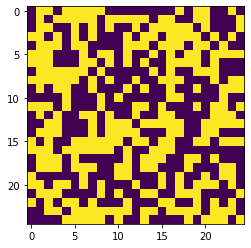

Average m: -0.0003200000000000001


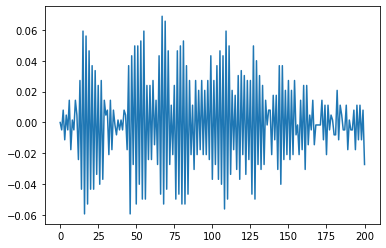

Average energy: -20.56


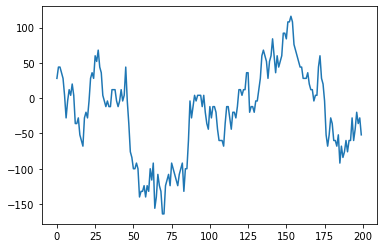

the distribution of spins after the process 


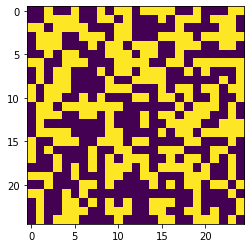

In [21]:
beta = 0.01
lattice = make_lattice()
a()

for beta value:  0.1
the distribution of spins before the process 


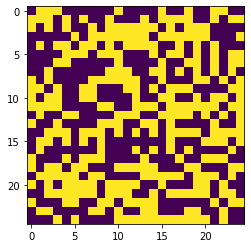

Average m: -0.0023839999999999985


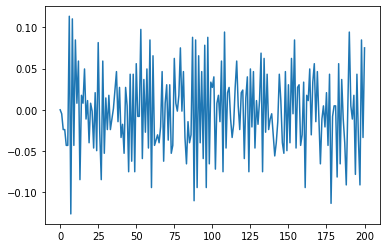

Average energy: -250.32


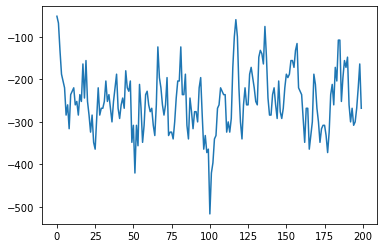

the distribution of spins after the process 


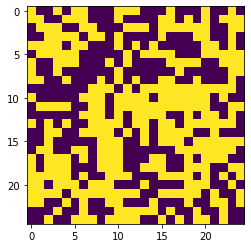

In [22]:
beta = 0.1
lattice = make_lattice()
a()

for beta value:  0.35
the distribution of spins before the process 


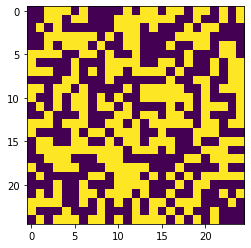

Average m: -0.013104000000000003


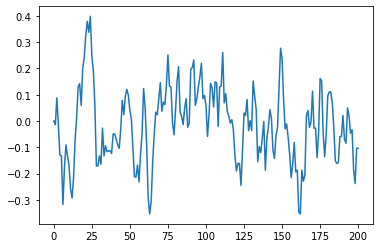

Average energy: -1093.32


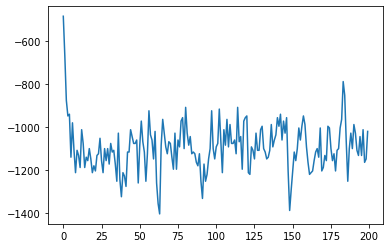

the distribution of spins after the process 


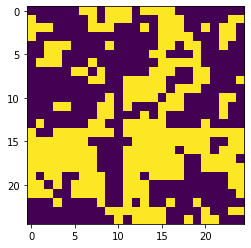

In [41]:
beta = 0.35
lattice = make_lattice()
a()

for beta value:  0.4
the distribution of spins before the process 


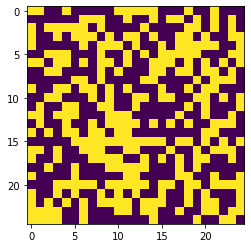

Average m: 0.3623840000000002


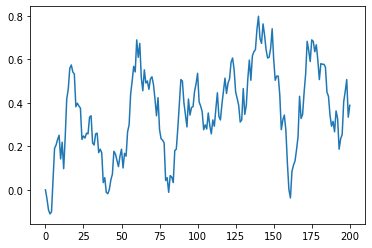

Average energy: -1433.72


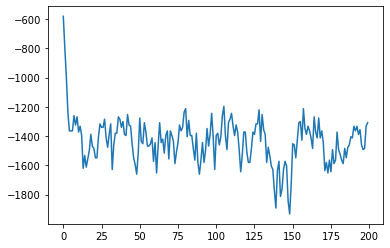

the distribution of spins after the process 


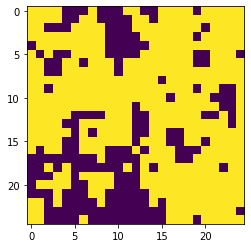

In [42]:
beta = 0.4
lattice = make_lattice()
a()

for beta value:  0.45
the distribution of spins before the process 


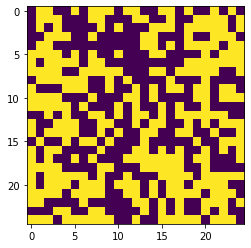

Average m: 0.6534719999999998


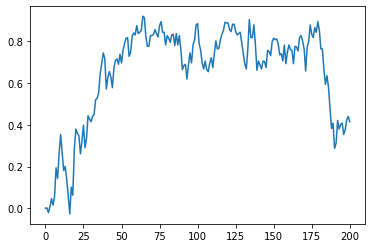

Average energy: -1818.24


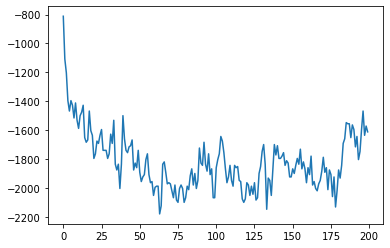

the distribution of spins after the process 


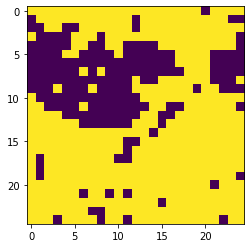

In [40]:
beta = 0.45
lattice = make_lattice()
a()

for beta value:  0.5
the distribution of spins before the process 


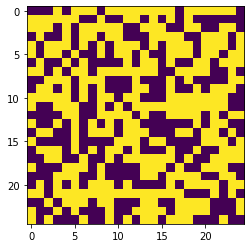

Average m: 0.8834560000000002


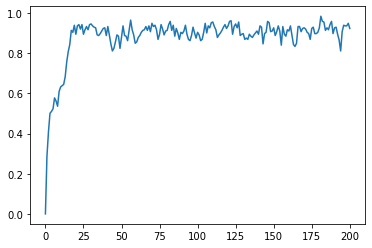

Average energy: -2139.52


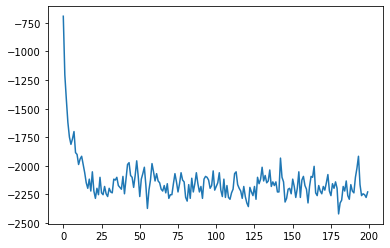

the distribution of spins after the process 


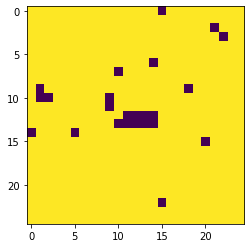

In [26]:
beta = 0.5
lattice = make_lattice()
a()

for beta value:  0.7
the distribution of spins before the process 


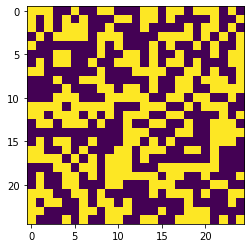

Average m: -0.9486079999999987


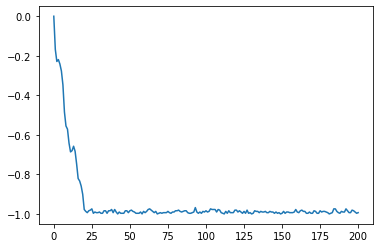

Average energy: -2415.88


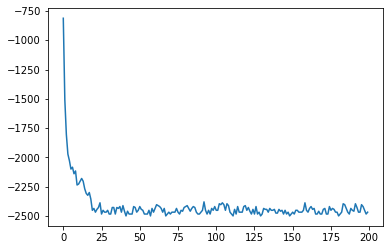

the distribution of spins after the process 


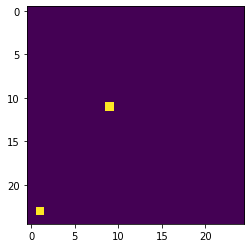

In [27]:
beta = 0.7
lattice = make_lattice()
a()

for beta value:  1
the distribution of spins before the process 


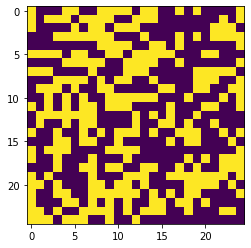

Average m: -0.9830079999999998


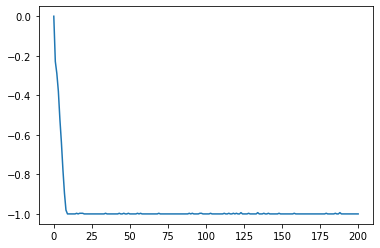

Average energy: -2472.24


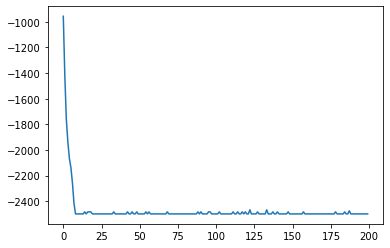

the distribution of spins after the process 


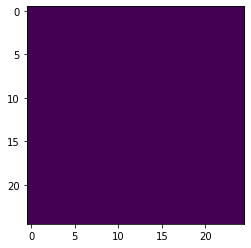

In [28]:
beta = 1
lattice = make_lattice()
a()